In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
a = 0.5
b = 0.3
N = 1_000_000
S_0 = 990_000
I_0 = 7_000
R_0 = 3_000
t_0, t_f = 0, 25
t = np.linspace(t_0, t_f, 50)

In [3]:
def system(X, t):
    S, I, R = X
    S_ = -1*a*S
    I_ = a*S-b*I
    R_ = b*I
    return np.array([S_, I_, R_])

In [4]:
res = sp.integrate.odeint(system, (S_0, I_0, R_0), t)
S, I, R = res.T

In [5]:
S_, I_, R_ = [sp.interpolate.interp1d(t, x, kind='cubic') for x in res.T]
time = np.linspace(t_0, t_f, 1000)

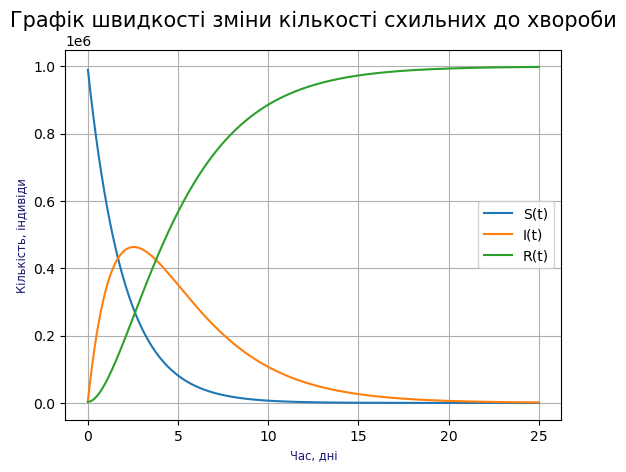

In [8]:
plt.plot(time, S_(time), label="S(t)")
plt.plot(time, I_(time), label="I(t)")
plt.plot(time, R_(time), label="R(t)")
plt.grid()
plt.xlabel("Час, дні", fontsize="small", color="midnightblue")
plt.ylabel("Кількість, індивіди", fontsize="small", color="midnightblue")
plt.title("Графік швидкості зміни кількості схильних до хвороби", fontsize=15)
plt.legend()